# Classification Modeling

In [20]:
import classifiers as clf

import pickle

import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler

from imblearn.over_sampling  import SMOTENC

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Species Data

In [21]:
species = pd.read_pickle("../Data/species.pkl")
print(species.shape)
species.head()

(11347, 48)


,Scientific Name,Common Name,Federal Listing Status,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,32413,22877,324,251,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Set Target and Feature Variables

In [22]:
# Create target variables
y = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create target variables
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
0,32413,22877,324,251,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32413,22877,324,251,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32413,22877,324,251,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32413,22877,324,251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32413,22877,324,251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create Training and Test Sets

In [23]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_sets = pd.DataFrame({'Train':        y_train.value_counts(),
                          'Test':         y_test.value_counts(),
                          'Train Normal': y_train.value_counts() / y_train.count(),
                          'Test Normal':  y_test.value_counts()  / y_test.count()})

data_sets.loc['Total'] = data_sets.sum().astype(int)
data_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6947,1728,0.765341,0.761233
Endangered,1504,380,0.165694,0.167401
Threatened,626,162,0.068966,0.071366
Total,9077,2270,1.000000,1.000000


### Feature Scaling

In [24]:
X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
5365,4110,1748,362,355,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,99699,32618,365,203,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8354,43901,12646,361,274,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7708,30161,18966,364,319,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5333,4110,1748,362,355,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
non_categorical_cols = ['Total Land Area (Thousands of Acres)',
                        'Forest Land Area (Thousands of Acres)',
                        'Days with AQI',
                        'Good Days']
categorical_cols     = ['Group_Amphibians', 'Group_Birds', 'Group_Clams', 'Group_Crustaceans',
                        'Group_Ferns and Allies', 'Group_Fishes', 'Group_Flowering Plants',
                        'Group_Insects', 'Group_Mammals', 'Group_Reptiles', 'Group_Snails',
                        'VIP_I', 'VIP_P', 'VIP_V', 'State_AL', 'State_AR', 'State_AZ',
                        'State_CA', 'State_CO', 'State_FL', 'State_GA', 'State_HI', 'State_ID',
                        'State_IL', 'State_IN', 'State_KY', 'State_MO', 'State_MS', 'State_NC',
                        'State_NM', 'State_NY', 'State_OR', 'State_PA', 'State_SC', 'State_TN',
                        'State_TX', 'State_UT', 'State_VA', 'State_WA', 'State_WV', 'State_WY']

In [26]:
scaler                        = MinMaxScaler()
X_train[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test[non_categorical_cols]  = scaler.transform(X_test[non_categorical_cols])

X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
5365,0.009448,0.010980,0.984211,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,0.271368,0.251706,1.000000,0.321429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8354,0.118478,0.095963,0.978947,0.638393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7708,0.080829,0.145247,0.994737,0.839286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5333,0.009448,0.010980,0.984211,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classification Model Hyper Parameter Grid Search

In [27]:
# define parameter grid search for all classifiers
classifiers = []

# dummy classifier
classifiers.append(
    clf.grid_search_dummy_classifier(dict(
        strategy=['most_frequent','stratified'])))

# logistic regression
classifiers.append(
    clf.grid_search_logistic_regression(dict(
        C=[1e-2,1e0,1e2,1e6,1e12],
        penalty=['l1', 'l2'],
        fit_intercept=[True, False],
        multi_class=['ovr'],
        solver=['liblinear'])))

# multinomial naive bayes classifer
classifiers.append(
    clf.grid_search_multinomial_nb(dict(
        alpha=[0.0,1.0],
        fit_prior=[True])))

# k nearest neighbors classifier
classifiers.append(
    clf.grid_search_k_neighbors_classifier(dict(
#        n_neighbors=[5,11],
#        weights=['uniform', 'distance'],
        algorithm=['ball_tree','kd_tree'],
        leaf_size=[100,200])))

# decision tree classifier
classifiers.append(
    clf.grid_search_decision_tree_classifier(dict(
        criterion=['gini','entropy'],
#        max_depth=[6,8],
#        min_samples_leaf=[20,50,100],
#        max_features=[20,30,40],
        min_impurity_decrease=[0.01,0.03,0.05])))

# random forest classifier
classifiers.append(
    clf.grid_search_random_forest_classifier(dict(
        n_estimators=[100,200,300],
#        max_depth=[2,3,4],
#        min_samples_leaf=[100,200],
#        max_features=[10,20],
        min_impurity_decrease=[0.01,0.03,0.05])))

# ada boost classifer
classifiers.append(
    clf.grid_search_ada_boost_classifier(dict(
        n_estimators=[100,200,300],
        learning_rate=[0.5,1.0])))

### Classification Training Model 1:  Fish & Wildlife Service

In [28]:
X_train_fws = X_train[categorical_cols]
X_test_fws  = X_test[categorical_cols]

# run FWS dataset
model_fws = clf.fit_predict_measure(
    'FWS', X_train_fws, X_test_fws, y_train, y_test, y_labels, classifiers)
model_fws

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0894s.) Setting batch_size=4.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1838s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3329s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0996s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   22.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.5s finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0787s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   10.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.5s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   36.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.0s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS,Dummy,{'strategy': 'most_frequent'},Train,0.765341,0.585747,0.765341,0.663608,NaN
1,FWS,Dummy,{'strategy': 'stratified'},Train,0.622783,0.615931,0.613969,0.619491,NaN
2,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
3,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
4,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
5,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.765341,0.585747,0.765341,0.663608,NaN
6,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.771400,0.683336,0.771400,0.680196,NaN
7,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
8,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
9,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.789027,0.724311,0.789027,0.725039,NaN


In [29]:
# statistics of FWS classifiers (test and training sets)
model_fws.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.775529,0.678886,0.775372,0.702400
std,0.023506,0.067169,0.024554,0.031164
min,0.622783,0.579476,0.613969,0.619491
25%,0.765341,0.585747,0.765341,0.663608
50%,0.784987,0.719885,0.784987,0.723166
75%,0.789137,0.724582,0.789137,0.725121
max,0.789248,0.753231,0.789248,0.739054


In [30]:
# best estimators of FWS dataset
model_fws_test = model_fws[model_fws['Split'] == 'Test']
model_fws_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
26,FWS,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.784581,0.753231,0.784581,0.739054,"[[1676, 30, 22], [126, 23, 13], [280, 18, 82]]"
31,FWS,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.779736,0.727587,0.779736,0.734440,"[[1657, 7, 64], [131, 7, 24], [265, 9, 106]]"
23,FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
55,FWS,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 300}",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
38,FWS,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.786344,0.718726,0.786344,0.721851,"[[1707, 0, 21], [149, 0, 13], [302, 0, 78]]"
2,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
48,FWS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"


### Classification Training Model 2:  FWS + Forest Service

In [31]:
X_train_fws_fs = X_train.drop(['Days with AQI', 'Good Days'], axis=1)
X_test_fws_fs  = X_test.drop(['Days with AQI', 'Good Days'], axis=1)

# run FWS + FS dataset
model_fws_fs = clf.fit_predict_measure(
    'FWS_FS', X_train_fws_fs, X_test_fws_fs, y_train, y_test, y_labels, classifiers)
model_fws_fs

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1125s.) Setting batch_size=2.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3147s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.1s finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0887s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   30.4s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.4s finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0731s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   11.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.9s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   38.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.0s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS_FS,Dummy,{'strategy': 'most_frequent'},Train,0.765341,0.585747,0.765341,0.663608,NaN
1,FWS_FS,Dummy,{'strategy': 'stratified'},Train,0.616173,0.617731,0.620800,0.623921,NaN
2,FWS_FS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
3,FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
4,FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
5,FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.765341,0.585747,0.765341,0.663608,NaN
6,FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.772282,0.722466,0.772282,0.682287,NaN
7,FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
8,FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
9,FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.789027,0.724311,0.789027,0.725039,NaN


In [32]:
# statistics of FWS + FS classifiers (test and training sets)
model_fws_fs.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.774842,0.679207,0.774925,0.702333
std,0.024415,0.067125,0.023870,0.030767
min,0.616173,0.579476,0.620800,0.623921
25%,0.765341,0.585747,0.765341,0.663608
50%,0.784987,0.719885,0.784987,0.721225
75%,0.789027,0.724582,0.789027,0.725121
max,0.789137,0.753231,0.789137,0.739054


In [33]:
# best estimators of FWS + FS dataset
model_fws_fs_test = model_fws_fs[model_fws_fs['Split'] == 'Test']
model_fws_fs_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
26,FWS_FS,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.784581,0.753231,0.784581,0.739054,"[[1676, 30, 22], [126, 23, 13], [280, 18, 82]]"
55,FWS_FS,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.787665,0.720792,0.787665,0.724654,"[[1706, 0, 22], [149, 0, 13], [297, 1, 82]]"
23,FWS_FS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
38,FWS_FS,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.786344,0.718726,0.786344,0.721851,"[[1707, 0, 21], [149, 0, 13], [302, 0, 78]]"
31,FWS_FS,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.760793,0.703036,0.760793,0.717845,"[[1617, 6, 105], [135, 4, 23], [268, 6, 106]]"
2,FWS_FS,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
48,FWS_FS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"


### Classification Training Model 3:  FWS + FS + Environmental Protection Agency

In [35]:
X_train_fws_fs_epa = X_train
X_test_fws_fs_epa  = X_test

# run FWS + FS + EPA dataset
model_fws_fs_epa = clf.fit_predict_measure(
    'FWS_FS_EPA', X_train_fws_fs_epa, X_test_fws_fs_epa, y_train, y_test, y_labels, classifiers)
model_fws_fs_epa

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1104s.) Setting batch_size=2.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0499s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.4s finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1193s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   30.1s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.5s finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0591s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   10.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.0s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   38.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.3s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS_FS_EPA,Dummy,{'strategy': 'most_frequent'},Train,0.765341,0.585747,0.765341,0.663608,NaN
1,FWS_FS_EPA,Dummy,{'strategy': 'stratified'},Train,0.614961,0.614287,0.612097,0.623732,NaN
2,FWS_FS_EPA,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
3,FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
4,FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.765341,0.585747,0.765341,0.663608,NaN
5,FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.761375,0.611878,0.761375,0.664447,NaN
6,FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.765231,0.585727,0.765231,0.663553,NaN
7,FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
8,FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.789027,0.724311,0.789027,0.725039,NaN
9,FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.789027,0.724311,0.789027,0.725039,NaN


In [36]:
# statistics of FWS + FS + EPA classifiers (test and training sets)
model_fws_fs_epa.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.774705,0.676607,0.774654,0.702106
std,0.024562,0.067015,0.024902,0.031133
min,0.614961,0.579476,0.612097,0.623732
25%,0.765341,0.585747,0.765341,0.663608
50%,0.784987,0.719259,0.784987,0.722209
75%,0.789027,0.724582,0.789027,0.725121
max,0.789137,0.753231,0.789137,0.739054


In [37]:
# best estimators of FWS + FS + EPA dataset
model_fws_fs_epa_test = model_fws_fs_epa[model_fws_fs_epa['Split'] == 'Test']
model_fws_fs_epa_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
26,FWS_FS_EPA,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.784581,0.753231,0.784581,0.739054,"[[1676, 30, 22], [126, 23, 13], [280, 18, 82]]"
55,FWS_FS_EPA,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 200}",Test,0.787225,0.721000,0.787225,0.724606,"[[1705, 1, 22], [149, 0, 13], [296, 2, 82]]"
23,FWS_FS_EPA,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.787665,0.720512,0.787665,0.724481,"[[1706, 0, 22], [149, 0, 13], [298, 0, 82]]"
31,FWS_FS_EPA,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.768722,0.715217,0.768722,0.722568,"[[1638, 6, 84], [137, 5, 20], [274, 4, 102]]"
38,FWS_FS_EPA,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.786344,0.718726,0.786344,0.721851,"[[1707, 0, 21], [149, 0, 13], [302, 0, 78]]"
2,FWS_FS_EPA,Dummy,{'strategy': 'most_frequent'},Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"
48,FWS_FS_EPA,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.761233,0.579476,0.761233,0.658035,"[[1728, 0, 0], [162, 0, 0], [380, 0, 0]]"


### Handling Class Imbalance with SMOTENC Oversampling

In [47]:
# balance classes with SMOTENC oversampling
smote = SMOTENC(categorical_features=list(range(4,len(X_train.columns))))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

# balanced data set statistics
smote_sets = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                           'Test Normal':  y_test.value_counts()        / y_test.count()})

smote_sets.loc['Total'] = smote_sets.sum().astype(int)
smote_sets

,Train,Test,Train Normal,Test Normal
Endangered,6947,380,0.333333,0.167401
Not Listed,6947,1728,0.333333,0.761233
Threatened,6947,162,0.333333,0.071366
Total,20841,2270,1.000000,1.000000


In [56]:
# check balanced model
X_train_smote.describe()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
count,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,...,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000
mean,0.133113,0.147117,0.926231,0.633637,0.007869,0.082002,0.080514,0.009740,0.009548,0.084113,...,0.031668,0.006382,0.012715,0.029605,0.037906,0.026822,0.025862,0.020009,0.007197,0.005806
std,0.128553,0.126816,0.181730,0.236077,0.088360,0.274374,0.272094,0.098214,0.097251,0.277564,...,0.175120,0.079632,0.112046,0.169499,0.190974,0.161567,0.158729,0.140033,0.084533,0.075977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067439,0.070693,0.952632,0.517857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092573,0.138767,0.984211,0.638393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.179938,0.190491,1.000000,0.781250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


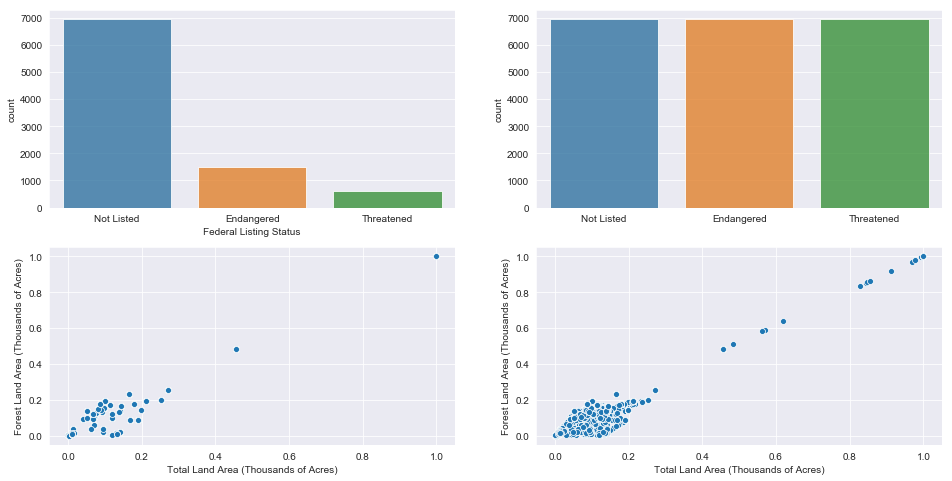

In [48]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(3, 2, figsize=(16,8))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])

### Balanced Classification Models

In [51]:
# run balanced dataset
model_fws_fs_epa_smote = clf.fit_predict_measure(
    'FWS_FS_EPA_SMOTE', X_train_smote, X_test, y_train_smote, y_test, y_labels, classifiers)
model_fws_fs_epa_smote

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  2.5min remaining:   37.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   18.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   20.0s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS_FS_EPA_SMOTE,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,FWS_FS_EPA_SMOTE,Dummy,{'strategy': 'stratified'},Train,0.331414,0.335113,0.327815,0.328347,NaN
2,FWS_FS_EPA_SMOTE,Dummy,{'strategy': 'stratified'},Test,0.335242,0.608031,0.335242,0.403189,"[[596, 566, 566], [53, 50, 59], [137, 128, 115]]"
3,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.543928,0.570595,0.543928,0.541756,NaN
4,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.549062,0.571798,0.549062,0.548199,NaN
5,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.543928,0.570595,0.543928,0.541756,NaN
6,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.548198,0.570521,0.548198,0.547269,NaN
7,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.581786,0.592730,0.581786,0.582146,NaN
8,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.582554,0.593288,0.582554,0.582836,NaN
9,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.581978,0.592909,0.581978,0.582328,NaN


In [52]:
# statistics of balanced classifiers (test and training sets)
model_fws_fs_epa_smote.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.533636,0.535384,0.533572,0.514907
std,0.091179,0.159533,0.091326,0.140008
min,0.331414,0.111111,0.327815,0.166667
25%,0.538290,0.560896,0.538290,0.535913
50%,0.565544,0.588837,0.565544,0.563367
75%,0.582122,0.593490,0.582122,0.582455
max,0.680176,0.754039,0.680176,0.706695


In [53]:
# best estimators of balanced dataset
model_fws_fs_epa_smote_test = model_fws_fs_epa_smote[model_fws_fs_epa_smote['Split'] == 'Test']
model_fws_fs_epa_smote_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
38,FWS_FS_EPA_SMOTE,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.676211,0.754039,0.676211,0.706695,"[[1295, 288, 145], [73, 75, 14], [133, 82, 165]]"
31,FWS_FS_EPA_SMOTE,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.680176,0.690107,0.680176,0.684886,"[[1380, 142, 206], [93, 35, 34], [223, 28, 129]]"
48,FWS_FS_EPA_SMOTE,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.629956,0.735247,0.629956,0.669199,"[[1182, 306, 240], [68, 75, 19], [120, 87, 173]]"
23,FWS_FS_EPA_SMOTE,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.617621,0.727225,0.617621,0.656758,"[[1141, 299, 288], [64, 71, 27], [126, 64, 190]]"
26,FWS_FS_EPA_SMOTE,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.611894,0.730994,0.611894,0.654658,"[[1134, 328, 266], [66, 75, 21], [117, 83, 180]]"
55,FWS_FS_EPA_SMOTE,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.597797,0.718965,0.597797,0.640137,"[[1097, 325, 306], [65, 65, 32], [128, 57, 195]]"
2,FWS_FS_EPA_SMOTE,Dummy,{'strategy': 'stratified'},Test,0.335242,0.608031,0.335242,0.403189,"[[596, 566, 566], [53, 50, 59], [137, 128, 115]]"


### Data Loading

In [54]:
model_fws.to_pickle('../Data/model_fws.pkl')
model_fws_fs.to_pickle('../Data/model_fws_fs.pkl')
model_fws_fs_epa.to_pickle('../Data/model_fws_fs_epa.pkl')
model_fws_fs_epa_smote.to_pickle('../Data/model_fws_fs_epa_smote.pkl')
pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')